# Introduction

### 1. Backgroun Information

In 4.0 manufacturing industries, the way to predict whether a machine will fail along with the cause of the failure is crucial. A proper prediction can reduce the replacement cost of faulty machines. Therefore, collecting useful information and creating a classification algorithm will benefit the industry.

A predictive Maintenance Dataset from the UCI Repository was used in this project to create such a classification model


### 2. Target of this project

There are two types of target features in this dataset. One is 'Target' which classifies whether the machine has failed, and the other is 'Failure Type' which indicates the reason for failure. Based on these target features, two main goals were established.

    1. prediction of whether a machine will fail or not
    2. Predicting the cause of a failure
    

# -------------------------------------------------------------------------------------------


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data_df = pd.read_csv('./predictive_maintenance.csv')

# 1. Basis Understanding of Dataset

In [3]:
print(data_df.shape)
data_df.head()

(10000, 10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
data_df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [6]:
data_df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

#### Insight

    1. The dataset contain 10,000 rows and 10 features
    2. There are no null values
    3. Target variable : 0(Not Failed) and 1(Failed)
    4. UDI & Product ID are for identification
 
### ----------------------------------------------------------------------------------------------------------------------------------

# 2. Target features distributions
    1. Distribution of 'Target' feature
    2. Distribution of 'Failture Type' feature
    3_1 & 3_2. make sure all the instances are correctly labeled

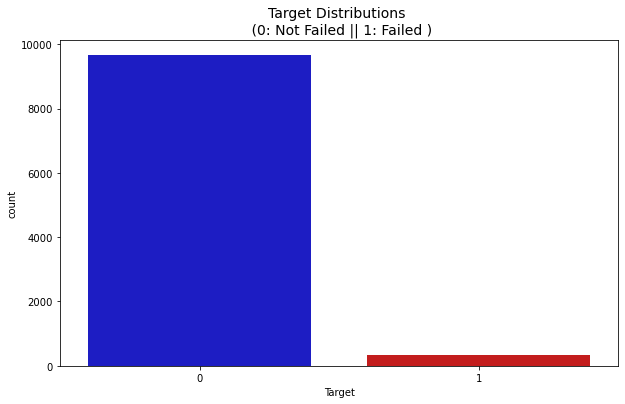

0    9661
1     339
Name: Target, dtype: int64


In [7]:
#1
colors = ["#0101DF", "#DF0101"]

plt.figure(figsize=(10,6))
sns.countplot('Target', data=data_df, palette=colors)
plt.title('Target Distributions \n (0: Not Failed || 1: Failed )', fontsize=14)

plt.show()

print(data_df['Target'].value_counts())

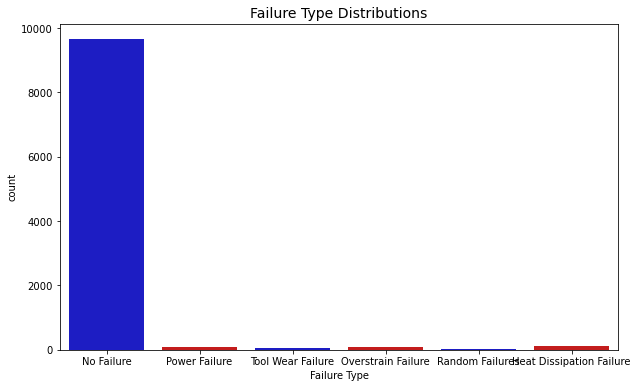

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64


In [8]:
#2
colors = ["#0101DF", "#DF0101"]

plt.figure(figsize=(10,6))
sns.countplot('Failure Type', data=data_df, palette=colors)
plt.title('Failure Type Distributions', fontsize=14)

plt.show()

print(data_df['Failure Type'].value_counts())

##### One thing to be aware of is that while Target Feture has 9562 of no failures, Failure Type feature has 9652 No Failure
    - 9 variables are labeled incorrectly
    - In order to do proper classification, mislabeld variable should be dropped

In [9]:
#3_1

df_fail = data_df[data_df['Target'] == 1]

print('Number of instances that are mislabelled:', df_fail[df_fail['Failure Type'] == 'No Failure'].shape[0])

df_fail[df_fail['Failure Type'] == 'No Failure']


Number of instances that are mislabelled: 9


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,1438,H30851,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,2750,M17609,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,4045,M18904,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,5537,M20396,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,5942,L53121,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,6479,L53658,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,8507,L55686,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,9016,L56195,L,297.2,308.1,1431,49.7,210,1,No Failure


#### Similar to the above code,  Faliure type = 'Random Failures' labeled incorrectly
    - while their Failure Type is "Random Failure", their labled as 0(No failure) in the Target column
    - There are 18 mislabeled variables

In [10]:
#3_2

df_fail = data_df[data_df['Target'] == 0]
print('Number of instances that are mislabelled:', df_fail[df_fail['Failure Type'] == 'Random Failures'].shape[0])

df_fail[df_fail['Failure Type'] == 'Random Failures']

Number of instances that are mislabelled: 18


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,1222,M16081,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,1303,L48482,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,2073,L49252,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,2560,L49739,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,3066,M17925,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,3453,H32866,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,5472,L52651,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,5490,L52669,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,5496,H34909,H,302.9,312.5,1357,55.0,12,0,Random Failures


1. Both Target & Failure type features are extremely imbalanced
2. There are total of 27 variables that are possibly mislabeled

### ----------------------------------------------------------------------------------------------------------------------------------

# 3. Preprocessing of data 

    1. 27 mislabeled variables indentified in the above section will be dropped
    2. UDI & Product ID column will be dropped since they are for identification purpose only
    3. Column name will be replaced to enhance the legibility
    4. reset index 
    
    ## Encoding for 'Target' & 'Failure Type' will be processed when they are specifically analysed ##

In [11]:
#1 

df_mislabeled_0 = data_df[data_df['Target'] == 0]
df_mislabeled_1 = data_df[data_df['Target'] == 1]

#drop the mislabeled indetified in section 2_3_1
index_mislabeld_0 = df_mislabeled_1[df_mislabeled_1['Failure Type'] == 'No Failure'].index
data_df.drop(index_mislabeld_0, axis=0, inplace=True)

#drop the mislabeled indetified in section 2_3_2
index_mislabeld_1 = df_mislabeled_0[df_mislabeled_0['Failure Type'] == 'Random Failures'].index
data_df.drop(index_mislabeld_1, axis=0, inplace=True)

In [12]:
#2

data_df.drop(['UDI', 'Product ID'],axis = 1, inplace = True)

In [13]:
#3

data_df = data_df.rename(mapper={'Air temperature [K]': 'Air temperature',
                       'Process temperature [K]': 'Process temperature',
                       'Rotational speed [rpm]': 'Rotational speed',
                       'Torque [Nm]': 'Torque', 
                       'Tool wear [min]': 'Tool wear'
                                }, axis=1)


In [14]:
#4
data_df.reset_index(inplace=True, drop=True)

In [15]:
data_df.shape

(9973, 8)

#### Insight
    - Original Data was 10,000 by 10 (10000 instances and 10 feature)
        - total of 27 instances (9+18) were dropped
        - 2 features(UDI and Product ID) were dropped

### ----------------------------------------------------------------------------------------------------------------------------------

# 4. Explatory Data Analysis

### Correlation Plot

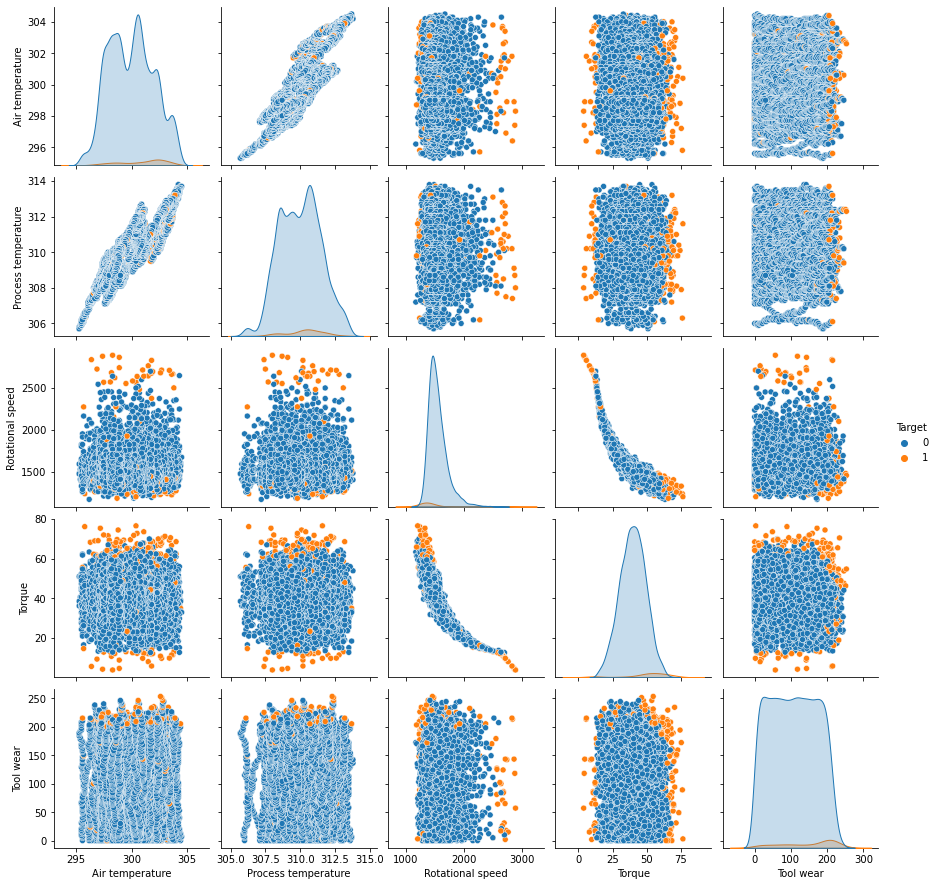

In [16]:
sns.pairplot(data_df, hue = 'Target', palette='tab10')

plt.show()

#### Insight
    - Failure appeares when the features are extremely low or high
    - Rotational Speed & Toque , Process temperature & Air temperature have high correlation

### Correlation Heat Map

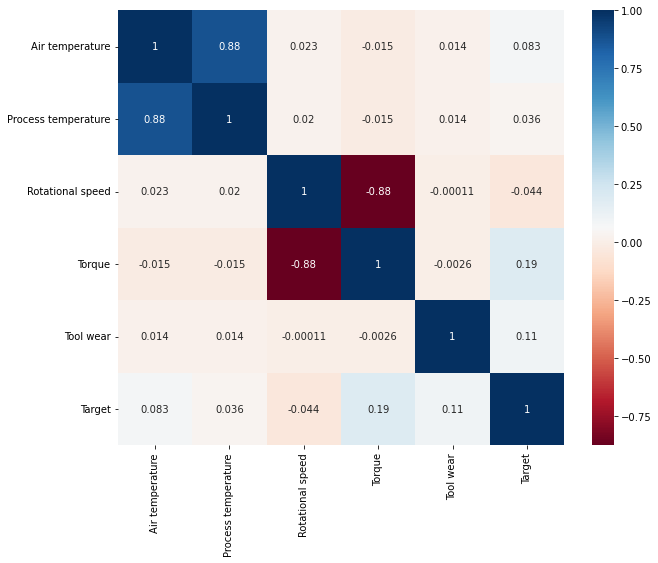

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_df.corr(), annot=True, cmap='RdBu')
plt.show()

#### Insight
    - As shown in the correlation plot
        - Process Temperature & Air Temperature shows positive correlation
        - Rotational Speed & Torque shows negative correlation

### Target class based on features
    - We will look at how failure type is distributed based on some of the features

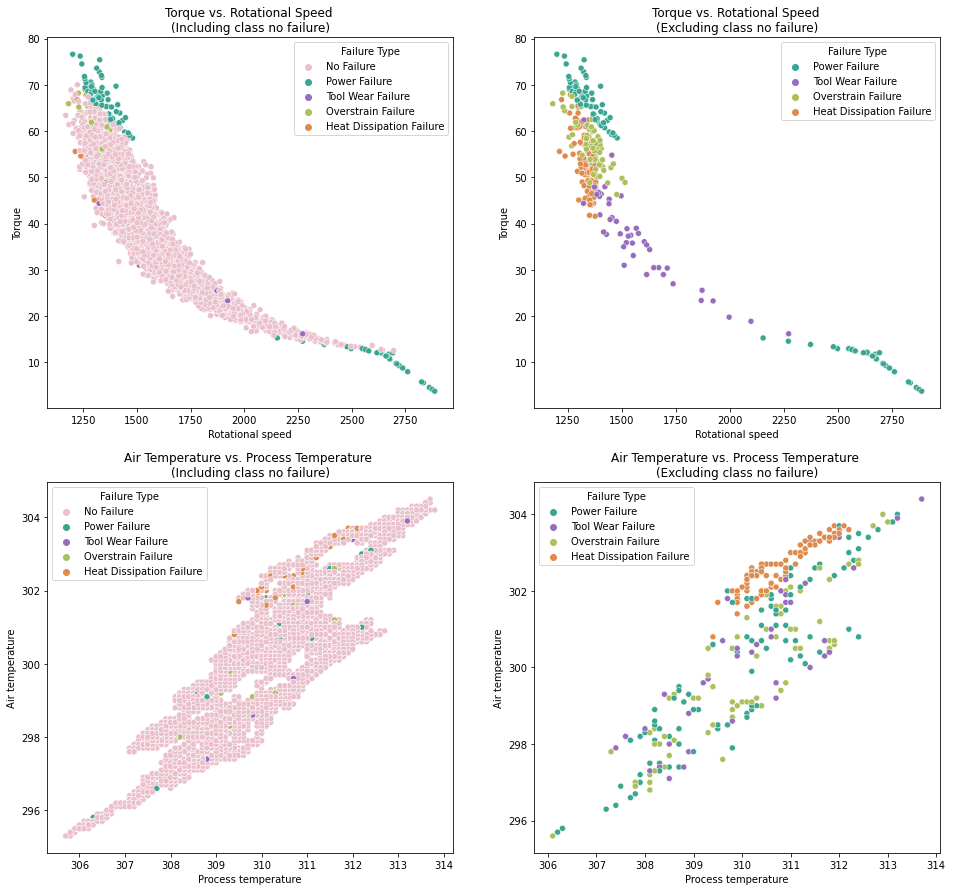

In [18]:
#1

fig, ax = plt.subplots(2,2, figsize = (16,15))

plt.title('Rot. Speed vs Torque wrt Failure Type')

color1 = ['#E9C0CB', '#39A692', '#976EBD', '#ACBF5C', '#DF8B4E']
color2 = ['#39A692', '#976EBD', '#ACBF5C', '#DF8B4E']

#Including No Failure
sns.scatterplot(data=data_df, x='Rotational speed', y='Torque', hue='Failure Type', palette= color1, ax=ax[0,0])

#Excluding No Failure
sns.scatterplot(data=data_df[data_df['Target'] == 1], x='Rotational speed', y='Torque', hue='Failure Type', palette=color2, ax=ax[0,1])

#Including No Failure
sns.scatterplot(data=data_df, x='Process temperature', y='Air temperature', hue='Failure Type', palette= color1, ax=ax[1,0])
#Excluding No Failure
sns.scatterplot(data=data_df[data_df['Target'] == 1], x='Process temperature', y='Air temperature', hue='Failure Type', palette= color2, ax=ax[1,1])

ax[0,0].set_title('Torque vs. Rotational Speed \n(Including class no failure)')
ax[0,1].set_title('Torque vs. Rotational Speed \n(Excluding class no failure)')

ax[1,0].set_title('Air Temperature vs. Process Temperature \n(Including class no failure)')
ax[1,1].set_title('Air Temperature vs. Process Temperature \n(Excluding class no failure)')

plt.show()

#### Insight
    - Torque vs. Roational Speed scatter plot
        1. Power Failure occurs when Rotationl speed & Torque are extremely low or high
        2. When Torque is high while Roational speed is low, Overstrain and Heat Dissipation failure occur
        
    - Process Temperature vs. Air Temeprature scatter plot
        1. High Process temperature and Air tempureate likely occur Heat Dissipation failure
        
    - Tool Wear Failure seems to be occured regardless of Process temeperature & Air temperature & Rotational Speed & Torque

### ----------------------------------------------------------------------------------------------------------------------------------
# 5. Feature Distributions
    1. Product Type Distribution
    2. Failure Type Distribution for each product Type
    3_1. Distribution of Target feature after removal of mislabelled features
    3_2. Distribution of Failure Type feature after removal of mislabelled features

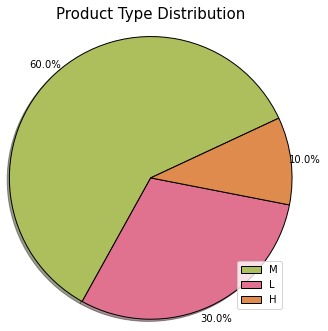

L    5984
M    2991
H     998
Name: Type, dtype: int64

In [19]:
#1

target_list = data_df['Type'].unique().tolist()  # Types of failures

plt.figure(figsize=(10,5))
colors = ['#ACBF5C','#E1728F', '#DF8B4E']

plt.pie(data_df['Type'].value_counts(), autopct = '%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=25,
        pctdistance=1.1, radius=1.3, colors=colors)

plt.legend(target_list, loc='lower right', fontsize=10)

plt.title('Product Type Distribution\n', fontsize=15)
plt.show()

data_df['Type'].value_counts()

#### Insight
    - Product type L/M/H each have 30%/60%/10% of total instances

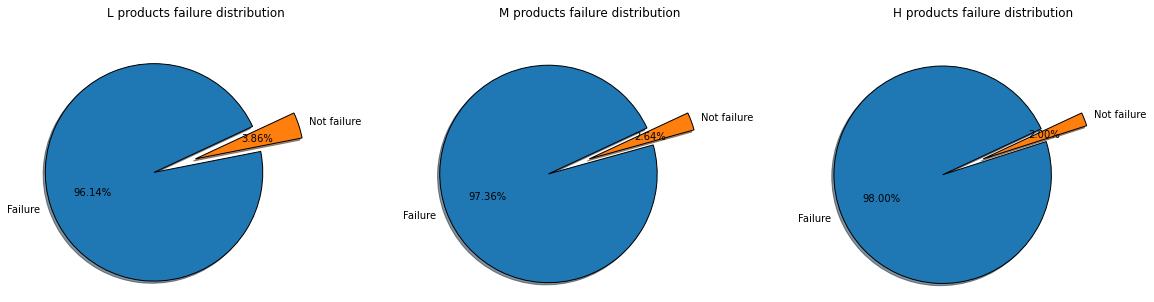

In [20]:
#2
fig, ax = plt.subplots(1,3, figsize = (20,5))
ax.flatten()

j = 0
color = ['#E1728F', '#976EBD']

for i in ['L', 'M', 'H']:
    product_type = data_df[data_df['Type']==i]
    ax[j].pie(product_type['Target'].value_counts(), autopct='%1.2f%%',
              labels=['Failure', 'Not failure'],
              startangle=25, shadow = True, explode=(0.4, 0),wedgeprops={'edgecolor': 'black'}
             )
    
    ax[j].set_title(i + ' products failure distribution')
    j+=1

#### Insight
    - The failure distribution of each product types indicates that all three product type has similar amount of failed products [2~3%]
    - Failure isn't highely correlated to the product type
    

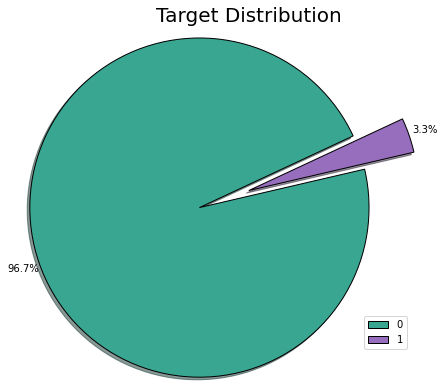

In [21]:
3_1

target_list = data_df['Target'].unique().tolist()  # Types of failures

plt.figure(figsize=(10,6))
colors = ['#39A692', '#976EBD']

plt.pie(data_df['Target'].value_counts(), explode=(0.4, 0), autopct = '%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=25,
        pctdistance=1.1, radius=1.3, colors=colors)
plt.legend(target_list, loc='lower right', fontsize=10)

plt.title('Target Distribution', fontsize=20)
plt.show()

#### Insight
    - Distribution of Target features after removing the mislabeled instances discovered in the Section 3
    - Only 3.3% of the total instances are identified as Failed
    - Such imbalance of target features often impact the accuracy of classification model

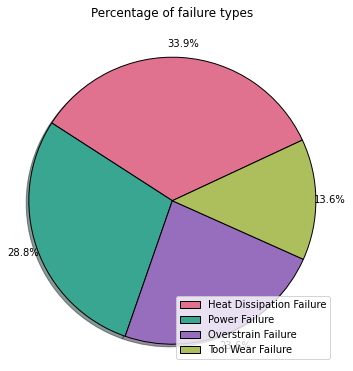

In [22]:
3_2

index_fail_type = data_df.loc[data_df['Failure Type'] != 'No Failure'].index
df_fail = data_df.loc[index_fail_type]
df_fail_percentage = 100*df_fail['Failure Type'].value_counts()/df_fail['Failure Type'].shape[0]

wO_nofailure = data_df[data_df['Failure Type'] != 'No Failure']
columns_failure_type = wO_nofailure['Failure Type'].unique().tolist()  # Types of failures

plt.figure(figsize=(10,6))
colors = ['#E1728F', '#39A692', '#976EBD', '#ACBF5C', '#DF8B4E']

plt.pie(df_fail_percentage, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=25,
        pctdistance=1.1, radius=1.1, colors=colors)
plt.legend(labels=df_fail_percentage.index.array, loc='lower right', fontsize=10)
plt.title('Percentage of failure types\n', fontsize=12)
plt.show()

#### Insight
    - Distribution of Failure Type features after removing the mislabeled instances discovered in the Section 3

#### -------------------------------------------------------------------------------------------------------------------------------------------------------
# 6. Idetification of Outliers and more feature distributions
    1. check the skeness of each features and possible outliers
    
   


------Skeness of each feature-----
Air temperature skewness = 0.115
Process temperature skewness = 0.016
Rotational speed skewness = 1.993
Torque skewness = -0.01
Tool wear skewness = 0.028


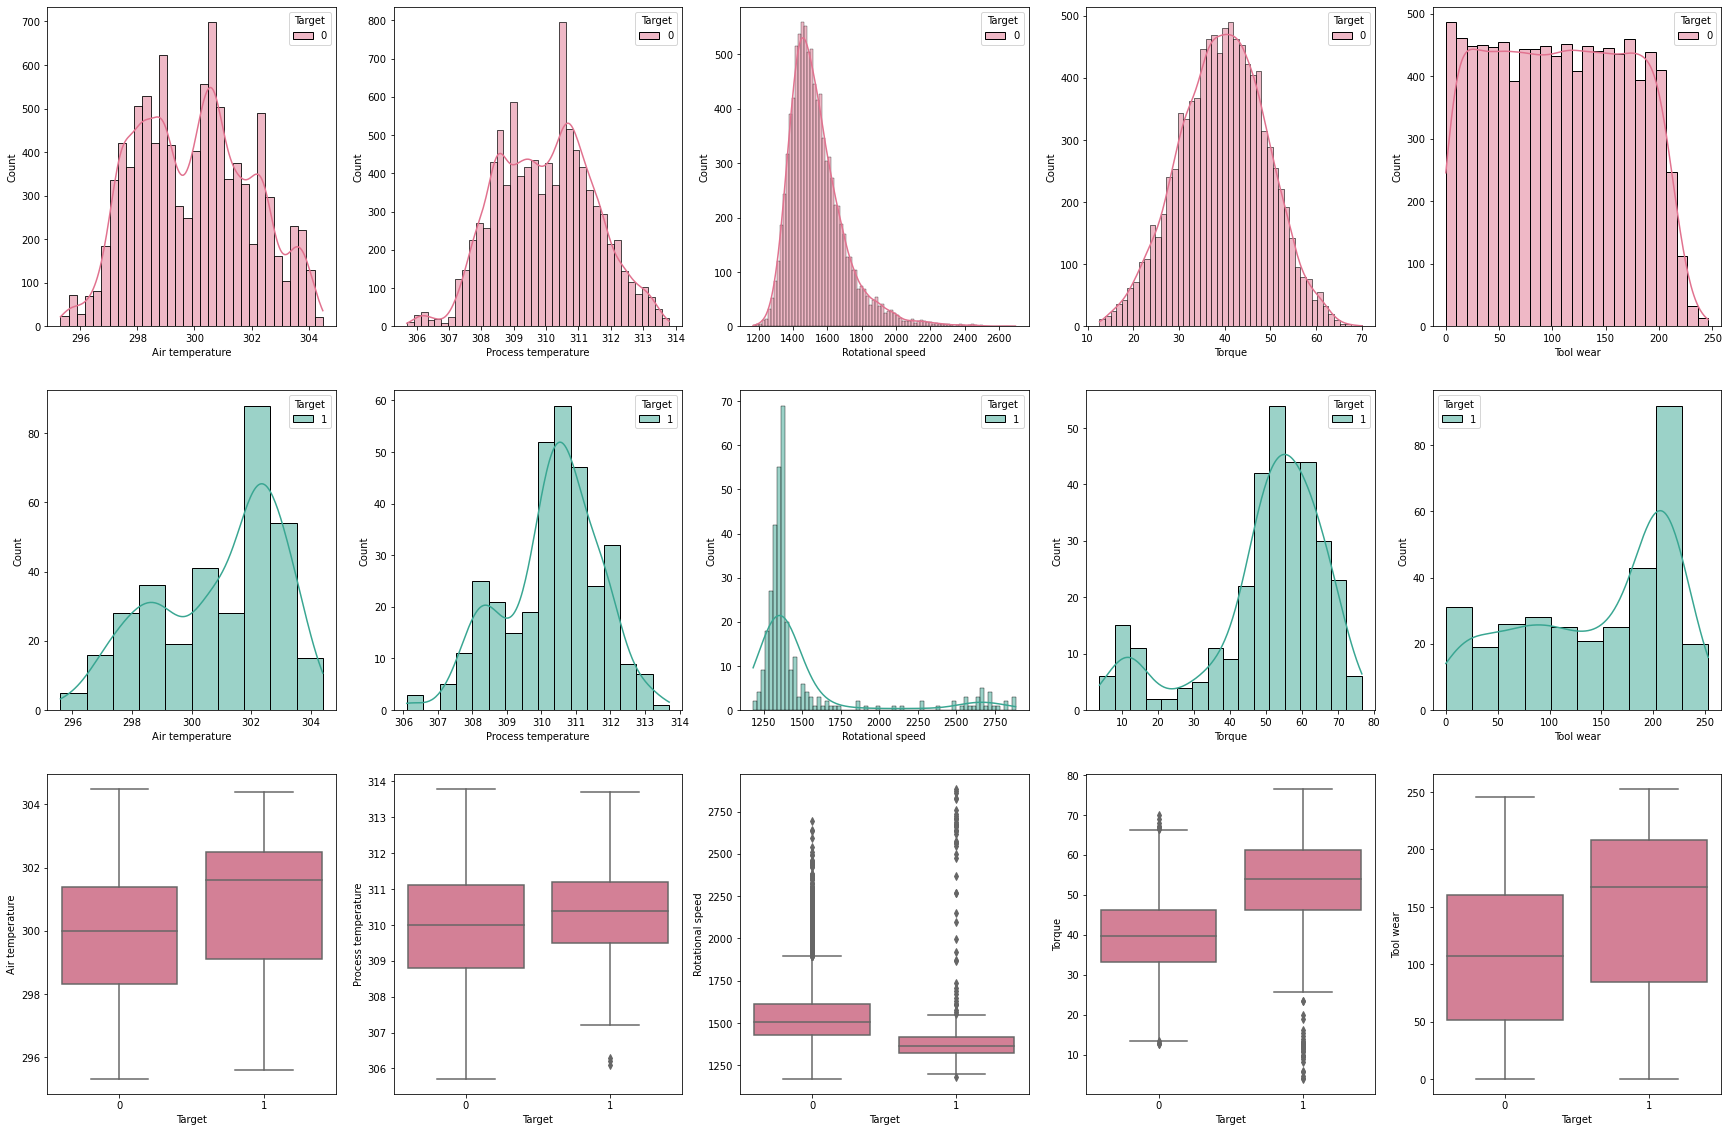

In [23]:
#1

features = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']

print('------Skeness of each feature-----')

fig, axes = plt.subplots(3, 5, figsize=[30,20])
j = 0

for i in features:
    #histogram of not failed product only
    sns.histplot(data=data_df[data_df['Target']==0], x=i, ax=axes[0,j], kde=True, hue='Target', palette=['#E1728F'])
    
    #histogram of failed product  only
    sns.histplot(data=data_df[data_df['Target']==1], x=i, ax=axes[1,j], kde=True, hue='Target', palette=['#39A692'])
    
    #boxplot that shows the outlier
    sns.boxplot(data=data_df, x='Target', y=i,  ax=axes[2,j], palette=['#E1728F'])
    j+=1
    print(f'{i} skewness = {round(data_df[i].skew(), 3)}')
    
    


#### Insight
    - Rotational Speed shows positive skewness of 1.993
        - possibly because of the outliers that Roational Speed has
        
    - Rotational Speed & Torque have outliers

#### -------------------------------------------------------------------------------------------------------------------------------------------------------
# 7. Check Outliers of Rotational Speed & Torque
    -  for all three of Product Types (L,M,H)
    
    1. create a function that identify outliers using IQR
    2. Speficy max & min outliers for each product type
    3. check the distribution of outliers for each product type
    4. check how much percentage of datas are considered as outliers

In [24]:
#1
import numpy as np

def get_outlier(df= None, figure = None, weight = 1.5):
    
    quantile_25 = np.quantile(df[figure].values,.25)
    quantile_75 = np.quantile(df[figure].values,.75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = df[ (df[figure]<lowest_val) | (df[figure]>highest_val)].index
    return outlier_index, lowest_val, highest_val


In [25]:
#2
for i in ['L', 'M', 'H']:
    df_product_type = data_df[data_df['Type'] == i]
    torque_outlier_index, torque_min, torque_max = get_outlier(df = df_product_type, figure = 'Torque', weight = 1.5)
    rot_outlier_index, rot_min, rot_max = get_outlier(df = df_product_type, figure = 'Rotational speed', weight = 1.5)

    print('Possible Outliers for each type product ' + i + ':')
    print('Toruqe: ')
    print(f'Max value: {round(torque_max,2)}')
    print(f'Min value: {round(torque_min,2)}')
    print('\nRotational Speed: ')
    print(f'Max value: {round(rot_max,2)}')
    print(f'Min value: {round(rot_min,2)}')
    print('-'*30)

Possible Outliers for each type product L:
Toruqe: 
Max value: 67.2
Min value: 12.8

Rotational Speed: 
Max value: 1894.0
Min value: 1142.0
------------------------------
Possible Outliers for each type product M:
Toruqe: 
Max value: 67.05
Min value: 13.05

Rotational Speed: 
Max value: 1895.75
Min value: 1137.75
------------------------------
Possible Outliers for each type product H:
Toruqe: 
Max value: 66.96
Min value: 12.66

Rotational Speed: 
Max value: 1894.38
Min value: 1143.38
------------------------------


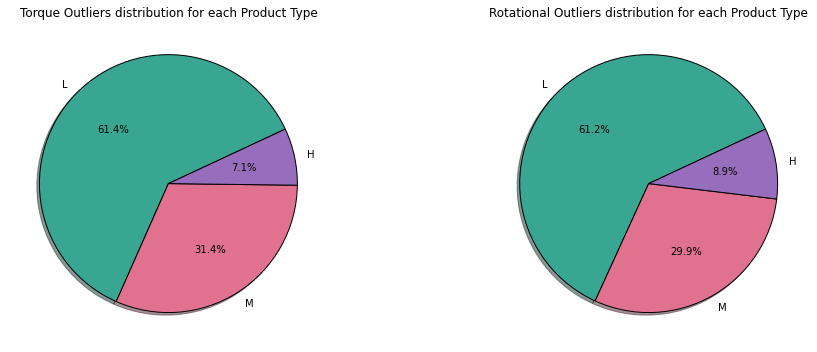

In [26]:
#3
torque_outlier_index, torque_min, torque_max = get_outlier(df = data_df, figure = 'Torque', weight = 1.5)
rot_outlier_index, rot_min, rot_max = get_outlier(df = data_df, figure = 'Rotational speed', weight = 1.5)

    
torque_outliers = data_df.iloc[torque_outlier_index]['Type'].value_counts()  
rotSpeed_outliers = data_df.iloc[rot_outlier_index]['Type'].value_counts()

fig, ax = plt.subplots(1,2, figsize=[15,5])
ax.flatten()

j=0
colors = ['#39A692', '#E1728F', '#976EBD']

for i in [torque_outliers, rotSpeed_outliers]:
    ax[j].pie(i, labels=['L', 'M', 'H'], colors=colors,
        autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=25)
    j+=1

ax[0].set_title('Torque Outliers distribution for each Product Type')
ax[1].set_title('Rotational Outliers distribution for each Product Type')
plt.tight_layout()

#### Insight
    - The proportion indecates that the outliers are not significantly correlated witht the product type
        - From #5_1, we were able to see that the distribution of Product type is approximatley 60-30-10
        - Distribution of outlier are similar to 60-30-10 as well.
            

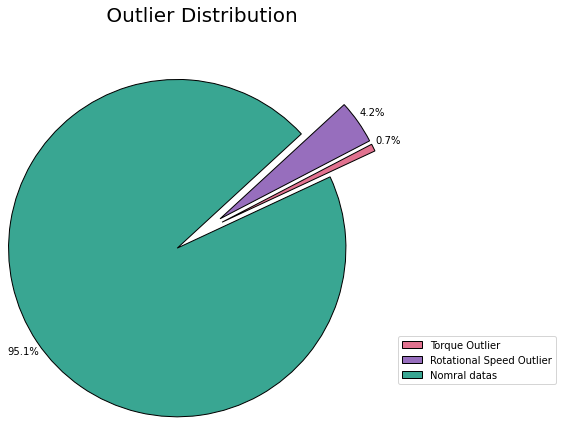

Percentage of total outlier: , 4.893%


In [27]:
#4

num_torque_outlier = torque_outlier_index.size
num_rot_outlier = rot_outlier_index.size
total_outlier = num_torque_outlier + num_rot_outlier
num_others = data_df.shape[0]-total_outlier



label = ['Torque Outlier', 'Rotational Speed Outlier', 'Nomral datas' ]
 
data = [num_torque_outlier,num_rot_outlier,num_others ]
  
colors = [ '#E1728F', '#976EBD','#39A692']
# Creating plot
fig = plt.figure(figsize =(10, 6))
plt.pie(data, autopct = '%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, startangle=25,
        pctdistance=1.1, radius=1.3, colors=colors, explode = (0.2,0.2,0.2))
 
# show plot
plt.legend(label, loc="best", bbox_to_anchor=(1.1,0.2))
plt.title(' Outlier Distribution\n\n', fontsize=20)
plt.tight_layout()
plt.show()

print(f'Percentage of total outlier: , {np.round(total_outlier / data_df.shape[0]*100,3)}%')

#### Insight
    - Interquantile Range (IQR) was used to identify the possible outliers in Rotational Speed & Torque features
    - Close to 5 percent of the total data includes an outlier. Hence, t is believed that removing the outliers in the future analysis will be benificial in generating a accuracy classification model.

#### -----------------------------------------------------------------------------------------------------------------------------------------------------
# 8. Data Pre-Processing
    1. Pie chart that displays the distribution of 'Failure Type' feature
    2. Using oversampling technique, the imbalanced dataset will be altered
    3. Pie chart that displays the distribution of 'Failure Type' feature after applying oversampling technique
    4. Categorial features including Product Type[L,M,H] and Failure Type [Power Failure, Overstrain Failre, etc..] will be encoded into numeric values

Failures percentage in data: 3.31


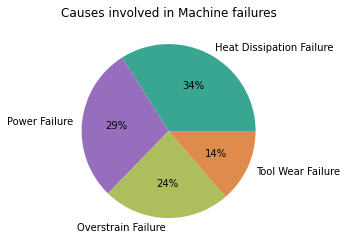

In [211]:
#1
n = data_df.shape[0]

idx_fail = data_df.loc[data_df['Failure Type'] != 'No Failure'].index
df_fail = data_df.loc[idx_fail]
df_fail_percentage = 100*df_fail['Failure Type'].value_counts()/df_fail['Failure Type'].shape[0]
print('Failures percentage in data:',
      round(100*data_df['Target'].sum()/n,2))
# Pie plot
plt.title('Causes involved in Machine failures')
plt.pie(x=df_fail_percentage.array, labels=df_fail_percentage.index.array,
        colors=['#39A692', '#976EBD', '#ACBF5C', '#DF8B4E'], autopct='%.0f%%')
plt.show()

In [29]:
#2

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

# n_working must represent 80% of the desired length of resampled dataframe
n_working = data_df['Failure Type'].value_counts()['No Failure']
desired_length = round(n_working/0.8)
spc = round((desired_length-n_working)/4)  #samples per class

# Resampling
balance_cause = {'No Failure':n_working,
                 'Overstrain Failure':spc,
                 'Heat Dissipation Failure':spc,
                 'Power Failure':spc,
                 'Tool Wear Failure':spc}
sm = SMOTENC(categorical_features=[0,7], sampling_strategy=balance_cause, random_state=0)
df_res, y_res = sm.fit_resample(data_df, data_df['Failure Type'])

Percentage increment of observations after oversampling: 20.88
SMOTE Resampled Failures percentage: 20.01


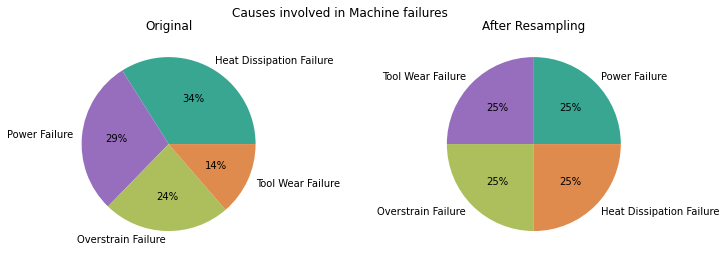

In [212]:
#3

idx_fail_res = df_res.loc[df_res['Failure Type'] != 'No Failure'].index
df_res_fail = df_res.loc[idx_fail_res]
fail_res_percentage = 100*df_res_fail['Failure Type'].value_counts()/df_res_fail.shape[0]

# Percentages
print('Percentage increment of observations after oversampling:',
      round((df_res.shape[0]-data_df.shape[0])*100/data_df.shape[0],2))
print('SMOTE Resampled Failures percentage:',
      round(df_res_fail.shape[0]*100/df_res.shape[0],2))

# Pie plot
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
fig.suptitle('Causes involved in Machine failures')
axs[0].pie(x=df_fail_percentage.array, labels=df_fail_percentage.index.array,
        colors=['#39A692', '#976EBD', '#ACBF5C', '#DF8B4E'], autopct='%.0f%%')
axs[1].pie(x=fail_res_percentage.array, labels=fail_res_percentage.index.array,
        colors=['#39A692', '#976EBD', '#ACBF5C', '#DF8B4E'], autopct='%.0f%%')
axs[0].title.set_text('Original')
axs[1].title.set_text('After Resampling')
plt.show()

In [31]:
#4

from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
type_dict = {'L': 0, 'M': 1, 'H': 2}
cause_dict = {'No Failure': 0,
              'Power Failure': 1,
              'Overstrain Failure': 2,
              'Heat Dissipation Failure': 3,
              'Tool Wear Failure': 4}

new_df = df_res.copy()

# Encoding
new_df['Type'].replace(to_replace=type_dict, inplace=True)
new_df['Failure Type'].replace(to_replace=cause_dict, inplace=True)

#### Insight
    1. Type Encoding
        - {'L' : 0, 'M' : 1, 'H' : 2}
        
    2. Failure Type
        - {'No Failure': 0,
              'Power Failure': 1,
              'Overstrain Failure': 2,
              'Heat Dissipation Failure': 3,
              'Tool Wear Failure': 4
              }

In [32]:
new_df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0
2,0,298.1,308.5,1498,49.4,5,0,0
3,0,298.2,308.6,1433,39.5,7,0,0
4,0,298.2,308.7,1408,40.0,9,0,0


#### Insight
    - As mentined in the section 5, the dataset especially 'Target' feature is extremely imbalanced. Such imbalanced data has high possibility of creating inaccuracte classification model. 
    - There are several way of reconstructing such data: Undersampling & Oversampling & etc.
    - While Undersampling removes the data to match the features with smallest distribution percentage,Oversampling create new data using KNN method
    - Because undersampling often distorts the orginal dataset, Oversampling method was used

#### -----------------------------------------------------------------------------------------------------------------------------------------------------
# 9. Data Pre-Processing - Scailing

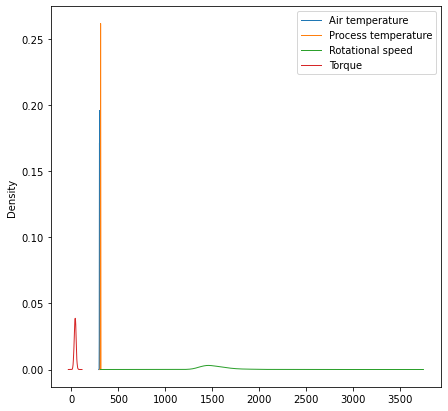

In [33]:
# Plotting the KDE Plot to check the distribution of each features before the encoding numerical values

features = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque']

# calling density() to make
# multiple density plot 
data_df[features].plot.density(figsize = (7, 7),
                       linewidth = 1)
plt.show()

In [34]:
#2_1
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()

new_df['scaled_Torque'] = rob_scaler.fit_transform(new_df['Torque'].values.reshape(-1,1))
new_df['scaled_rotSpeed'] = rob_scaler.fit_transform(new_df['Rotational speed'].values.reshape(-1,1))

new_df.drop(['Torque','Rotational speed'], axis=1, inplace=True)

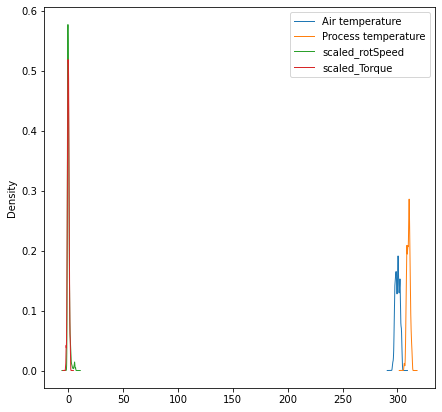

In [35]:
# Plotting the KDE Plot to check the distribution of after removing outliers from Torque and Rotational Speed

features = ['Air temperature', 'Process temperature', 'scaled_rotSpeed', 'scaled_Torque']

# calling density() to make
# multiple density plot 
new_df[features].plot.density(figsize = (7, 7),
                       linewidth = 1)
plt.show()

In [36]:
#2_2
from sklearn.preprocessing import StandardScaler, MinMaxScaler

columns = ['Air temperature', 'Process temperature', 'Tool wear', 'scaled_rotSpeed', 'scaled_Torque']

scaler = StandardScaler()

features_scaled = scaler.fit_transform(new_df[columns])
features_scaled = pd.DataFrame(features_scaled, columns=columns)
new_df.drop(columns, axis=1, inplace=True)
new_df = pd.concat([new_df, features_scaled], axis=1)


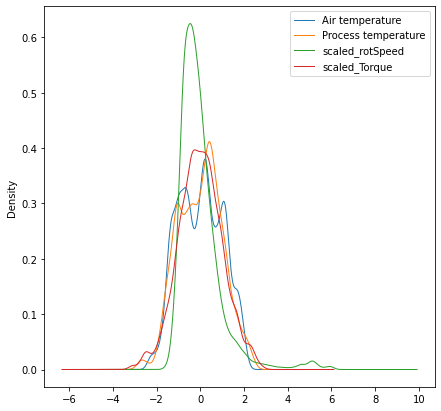

In [37]:
# Plotting the KDE Plot to check the distribution of after appling standardscaler to all features

features = ['Air temperature', 'Process temperature', 'scaled_rotSpeed', 'scaled_Torque']

new_df[features].plot.density(figsize = (7, 7),
                       linewidth = 1)
plt.show()

In [38]:
new_df.describe()

,Type,Target,Failure Type,Air temperature,Process temperature,Tool wear,scaled_rotSpeed,scaled_Torque
count,12055.000000,12055.000000,12055.000000,1.205500e+04,1.205500e+04,1.205500e+04,1.205500e+04,1.205500e+04
mean,0.450353,0.200083,0.500207,-1.995361e-14,2.675497e-14,-3.967885e-16,8.652464e-18,-4.201994e-16
std,0.651353,0.400079,1.118266,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,0.000000,0.000000,0.000000,-2.422862e+00,-3.014990e+00,-1.729907e+00,-1.635458e+00,-3.218738e+00
25%,0.000000,0.000000,0.000000,-8.147391e-01,-7.933256e-01,-8.708938e-01,-6.136066e-01,-6.561698e-01
50%,0.000000,0.000000,0.000000,3.957634e-02,3.979834e-02,2.930172e-03,-2.147259e-01,-6.985923e-03
75%,1.000000,0.000000,0.000000,8.042528e-01,7.038763e-01,9.063753e-01,3.096454e-01,6.507399e-01
max,2.000000,1.000000,4.000000,2.200492e+00,2.608597e+00,2.017169e+00,6.064284e+00,2.999761e+00


#### Insight
    - The graphs shows KDE density of the features after scailing
    - The first and the second graph shows abnormal range
        - In order to normally distribute them, the outliers were removed and the featues were standarized
    - after getting rid of outliers using RobustScaler and standarize with StandardScaler, data is now normally distributed as shown in the last graph

#### -------------------------------------------------------------------------------------------------------------------------------------------------------
# 10. Modeling with 'Target' feature - Binary Classification
    1. The dataset will be splited using Stratified Shuffle Split.
    2. 6 differnt Machine Lerning models will be evaluated based on Accuracy, Precision, Recall, F1, AUC
        - Accuracy and AUC score will be the main evaluation point

In [102]:
#1
from sklearn.model_selection import StratifiedShuffleSplit

df_copy = new_df.copy()

X = df_copy.drop(['Target','Failure Type'], axis = 1)
y = df_copy['Target']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
print('-'*30)
print('Checking the stratified split...')
print('Target proportion in original dataset:')
print(df_copy['Target'].value_counts(normalize=True))

print('Target proportion in y_train dataset:')
print(y_train.value_counts(normalize=True))

print('Target proportion in y_test dataset:')
print(y_test.value_counts(normalize=True))
print('-'*30)

------------------------------
Checking the stratified split...
Target proportion in original dataset:
0    0.799917
1    0.200083
Name: Target, dtype: float64
Target proportion in y_train dataset:
0    0.799912
1    0.200088
Name: Target, dtype: float64
Target proportion in y_test dataset:
0    0.799934
1    0.200066
Name: Target, dtype: float64
------------------------------


#### Insight
    - Datasets are properly splited using stratifiedsplit
    - 0 class is 80 percent ,and 1 class is 20 percent of each dataset

In [103]:
#2

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, roc_auc_score,recall_score, confusion_matrix, roc_curve, precision_recall_curve
from imblearn.ensemble import BalancedRandomForestClassifier,BalancedBaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'XGBoost' :XGBClassifier()
}

score_lists = []

for key, classifier in classifiers.items():
    
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    score_lists.append([accuracy_score(y_test, y_pred), 
                        precision_score(y_test, y_pred),
                        recall_score(y_test, y_pred),
                        f1_score(y_test, y_pred),
                        roc_auc_score(y_test, y_pred)]
                      )

index = ['Logisitic Regression', 'KNearest', 'SVC', 'Decision Tree', 'Random Forest','XGBoost']

columns = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']

score_df = pd.DataFrame(np.round(score_lists,4), index =index, columns = columns )
score_df

,Accuracy,Precision,Recall,F1,AUC
Logisitic Regression,0.8789,0.7565,0.5821,0.6579,0.7676
KNearest,0.9559,0.8529,0.9420,0.8952,0.9507
SVC,0.9453,0.8578,0.8706,0.8642,0.9173
Decision Tree,0.9718,0.9274,0.9320,0.9297,0.9569
Random Forest,0.9821,0.9420,0.9701,0.9559,0.9776
XGBoost,0.9841,0.9527,0.9685,0.9605,0.9782


#### Insight
    - XGBoost and RandomForest Classifier showed relatively high AUC score than the other 4 classifiers
    - Since the scores were obtained without tunning HyperParameter
        - RandomForestClassifier & XGBoostClassifier's hyperparmeter will be tuned in the later section to check if the scores can be improved

## 10_1 : RandomForestClassifier HyperParameter tuning

In [114]:
from sklearn.model_selection import train_test_split

def split_data():
    df_copy = new_df.copy()

    X = df_copy.drop(['Target','Failure Type'], axis = 1)
    y = df_copy['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return X_train, X_test, y_train, y_test 

def get_evaluation(pred, index):
    score_lists = []
    
    score_lists.append([accuracy_score(y_test, pred), 
                        precision_score(y_test, pred),
                        recall_score(y_test, pred),
                        f1_score(y_test, pred),
                        roc_auc_score(y_test, pred)]
                      )

    columns = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']

    score_df = pd.DataFrame(np.round(score_lists,4), index =index, columns = columns )
    return score_df


In [108]:
from sklearn.model_selection import GridSearchCV
rfc_clf = RandomForestClassifier(random_state=42)


# Cross Validation and Grid Search
param_grid = { 
    'n_estimators': [50, 100, 200, 500],
    'max_depth' : [ 5, 7, 11, 13, 15]
}


grid_cv = GridSearchCV(rfc_clf, param_grid=param_grid, cv= 5)
grid_cv.fit(X_train,y_train)

print(grid_cv.best_params_)

{'max_depth': 15, 'n_estimators': 500}


In [209]:
X_train, X_test, y_train, y_test = split_data()

score_lists = []

clf = RandomForestClassifier(max_depth= 15,
                             n_estimators=500,
                             random_state=42)

clf.fit(X_train,y_train)

rfc_pred = clf.predict(X_test)

score_df = get_evaluation(rfc_pred, index = ['RandomForestClf'])

print(classification_report(y_test,rfc_pred))
score_df

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.94      0.97      0.96       472

    accuracy                           0.98      2411
   macro avg       0.97      0.98      0.97      2411
weighted avg       0.98      0.98      0.98      2411



,Accuracy,Precision,Recall,F1,AUC
RandomForestClf,0.983,0.9443,0.9703,0.9572,0.9782


#### Insight
    - After tunning the hyperparameter of RandomForestClassifier, both Accuracy and AUC scores were slightly incrased

## 10_2 : XGBoost Hyperparameter Tuning

In [119]:
X_train, X_test, y_train, y_test = split_data()

xgb_clf = XGBClassifier(random_state=42)


# Cross Validation and Grid Search
param_grid = {'n_estimators':[300,500],
              'max_depth':[5,7,9],
              'learning_rate':[0.01,0.05, 0.07, 0.09, 0.1]}

grid_cv = GridSearchCV(xgb_clf, param_grid=param_grid, cv= 5)
grid_cv.fit(X_train,y_train)

print(grid_cv.best_params_)

{'learning_rate': 0.09, 'max_depth': 7, 'n_estimators': 500}


In [210]:
score_lists = []

clf = XGBClassifier(max_depth= 7,
                    learning_rate = 0.09,
                    n_estimators=500,
                    random_state=42)

clf.fit(X_train,y_train)

xgb_pred = clf.predict(X_test)

score_df = get_evaluation(xgb_pred, index = ['XGBClassifier'])

print(classification_report(y_test,xgb_pred))
score_df

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.96      0.98      0.97       472

    accuracy                           0.99      2411
   macro avg       0.98      0.98      0.98      2411
weighted avg       0.99      0.99      0.99      2411



,Accuracy,Precision,Recall,F1,AUC
XGBClassifier,0.9884,0.9644,0.9767,0.9705,0.984


#### Insight
    - For both XGBClassifier and RandomForestClassifier, the evalauation scores got slightly increased
        - RandomForest : AUC increased from 0.9776 to 0.9784
        - XGBClassifier : AUC increased from 0.0.9782 to 0.0.9792
        

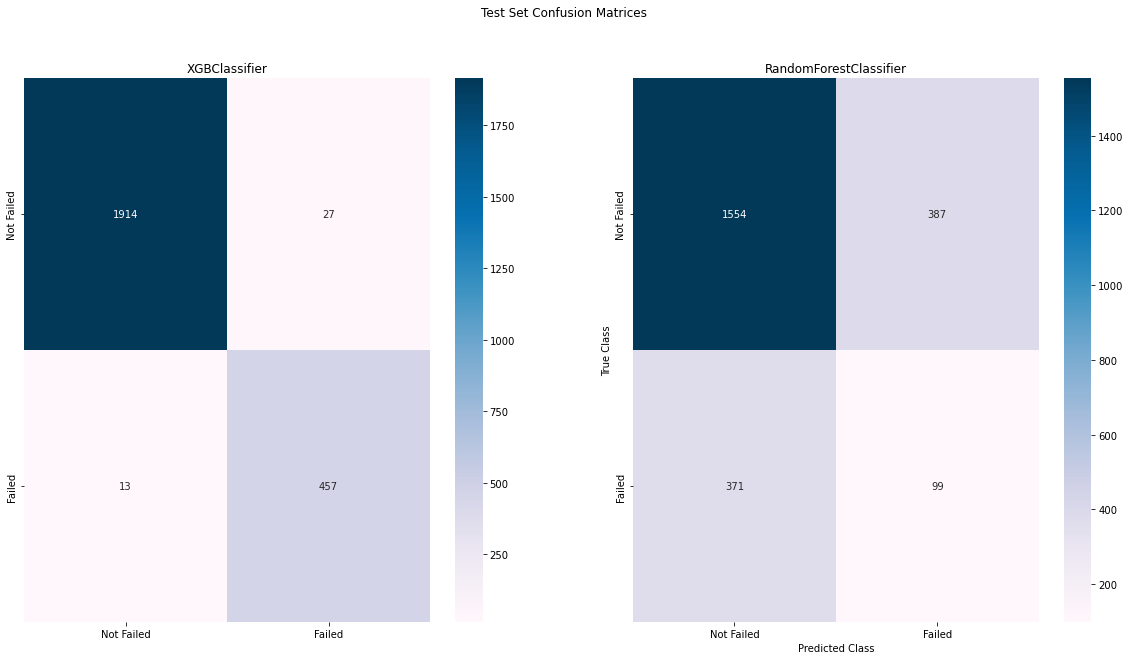

In [208]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


xgb_cm = confusion_matrix(y_test, xgb_pred)
rcf_cm = confusion_matrix(y_test, rfc_pred)

fig,ax = plt.subplots(ncols = 2,figsize=(20,10))

fig.suptitle('Test Set Confusion Matrices')

sns.heatmap(ax = ax[0], data=xgb_cm, annot=True,
                fmt='d', cmap='PuBu')

sns.heatmap(ax = ax[1], data=rcf_cm, annot=True,
                fmt='d', cmap='PuBu')

ax[0].title.set_text('XGBClassifier')
ax[1].title.set_text('RandomForestClassifier')

ax[0].xaxis.set_ticklabels(['Not Failed', 'Failed']) 
ax[0].yaxis.set_ticklabels(['Not Failed', 'Failed']) 
ax[1].xaxis.set_ticklabels(['Not Failed', 'Failed']) 
ax[1].yaxis.set_ticklabels(['Not Failed', 'Failed']) 

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [ ]:
# Feature importance

#### --------------------------------------------------------------------------------------------------------------------------------------------------------
# 11. Modeling with 'Failure Type' feature - Multiclass Classification

In [213]:
from sklearn.model_selection import train_test_split

def split_data():
    df_copy = new_df.copy()

    X = df_copy.drop(['Target','Failure Type'], axis = 1)
    y = df_copy['Failure Type']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return X_train, X_test, y_train, y_test 

def get_evaluation(pred, index):
    score_lists = []
    
    score_lists.append([accuracy_score(y_test, pred), 
                        precision_score(y_test, pred),
                        recall_score(y_test, pred),
                        f1_score(y_test, pred),
                        roc_auc_score(y_test, pred)]
                      )

    columns = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']

    score_df = pd.DataFrame(np.round(score_lists,4), index =index, columns = columns )
    return score_df


In [219]:
X_train, X_test, y_train, y_test  = split_data()

print('-'*30)
print('Checking the split...')
print('Target proportion in original dataset:')
print(df_copy['Failure Type'].value_counts(normalize=True))

print('Target proportion in y_train dataset:')
print(y_train.value_counts(normalize=True))

print('Target proportion in y_test dataset:')
print(y_test.value_counts(normalize=True))
print('-'*30)

------------------------------
Checking the split...
Target proportion in original dataset:
0    0.799917
1    0.050021
4    0.050021
2    0.050021
3    0.050021
Name: Failure Type, dtype: float64
Target proportion in y_train dataset:
0    0.798528
2    0.051431
4    0.050912
3    0.049668
1    0.049461
Name: Failure Type, dtype: float64
Target proportion in y_test dataset:
0    0.805475
1    0.052260
3    0.051431
4    0.046454
2    0.044380
Name: Failure Type, dtype: float64
------------------------------


In [383]:
classifiers = {
    'RandomForestClassifier' : RandomForestClassifier(),
    'XGBoost' :XGBClassifier()
}

score_lists = []

for key, classifier in classifiers.items():
    
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)
    
    score_lists.append([ 
                        roc_auc_score(y_test, y_pred_proba, average="macro", multi_class="ovr")]
                      )

index = ['Random Forest','XGBoost']

columns = ['AUC']

score_df = pd.DataFrame(np.round(score_lists,4), index =index, columns = columns )
score_df

,AUC
Random Forest,0.9989
XGBoost,0.9990


## 11_1 : RandomForestClassifier Hyper Parameter Tunning

In [245]:

rfc_clf = RandomForestClassifier(random_state=42)

# Cross Validation and Grid Search
param_grid = { 
    'n_estimators': [50, 100, 200, 500],
    'max_depth' : [ 5, 7, 11, 13, 15]
}


grid_cv = GridSearchCV(rfc_clf, param_grid=param_grid, cv= 5)
grid_cv.fit(X_train,y_train)

print(grid_cv.best_params_)

{'max_depth': 15, 'n_estimators': 500}


In [384]:
X_train, X_test, y_train, y_test = split_data()

score_lists = []

rcf_clf = RandomForestClassifier(max_depth= 15,
                             n_estimators=500,
                             random_state=42)

rcf_clf.fit(X_train,y_train)

clf_pred = rcf_clf.predict(X_test)
clf_pred_proba = rcf_clf.predict_proba(X_test)
    
score_lists.append([ 
                    roc_auc_score(y_test, clf_pred_proba, average="macro", multi_class="ovr")]
                      )

index = ['Random Forest']

columns = ['AUC']

score_df = pd.DataFrame(np.round(score_lists,4), index =index, columns = columns )

print(classification_report(y_test,clf_pred))

score_df

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1927
           1       0.92      0.96      0.94       126
           2       0.98      0.96      0.97       126
           3       0.94      0.98      0.96       124
           4       0.92      0.94      0.93       108

    accuracy                           0.98      2411
   macro avg       0.95      0.97      0.96      2411
weighted avg       0.98      0.98      0.98      2411



,AUC
Random Forest,0.9995


## 11_2 : XGBoost Hyperparameter Tuning

In [251]:
X_train, X_test, y_train, y_test = split_data()

xgb_clf = XGBClassifier(random_state=42)


# Cross Validation and Grid Search
param_grid = {'n_estimators':[300,500],
              'max_depth':[5,7,9],
              'learning_rate':[0.01,0.05, 0.07, 0.09, 0.1]}

grid_cv = GridSearchCV(xgb_clf, param_grid=param_grid, cv= 5)
grid_cv.fit(X_train,y_train)

print(grid_cv.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}


In [385]:
score_lists = []

xgb_clf = XGBClassifier(max_depth= 5,
                    learning_rate = 0.1,
                    n_estimators=500,
                    random_state=42)

xgb_clf.fit(X_train,y_train)

xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

score_lists = []
    
score_lists.append([
                    roc_auc_score(y_test, xgb_pred_proba, average="macro", multi_class="ovr")]
                      )

index = ['XGBoost']

columns = ['AUC']

score_df = pd.DataFrame(np.round(score_lists,4), index =index, columns = columns )

print(classification_report(y_test,xgb_pred))

score_df

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1927
           1       0.95      0.99      0.97       126
           2       0.98      0.98      0.98       126
           3       0.99      1.00      1.00       124
           4       0.93      0.95      0.94       108

    accuracy                           0.99      2411
   macro avg       0.97      0.98      0.98      2411
weighted avg       0.99      0.99      0.99      2411



,AUC
XGBoost,0.9996


#### Insight
    - For Failure Type Classification model, both XGboosth & RandomForestClassifier showed high AUC scores
    

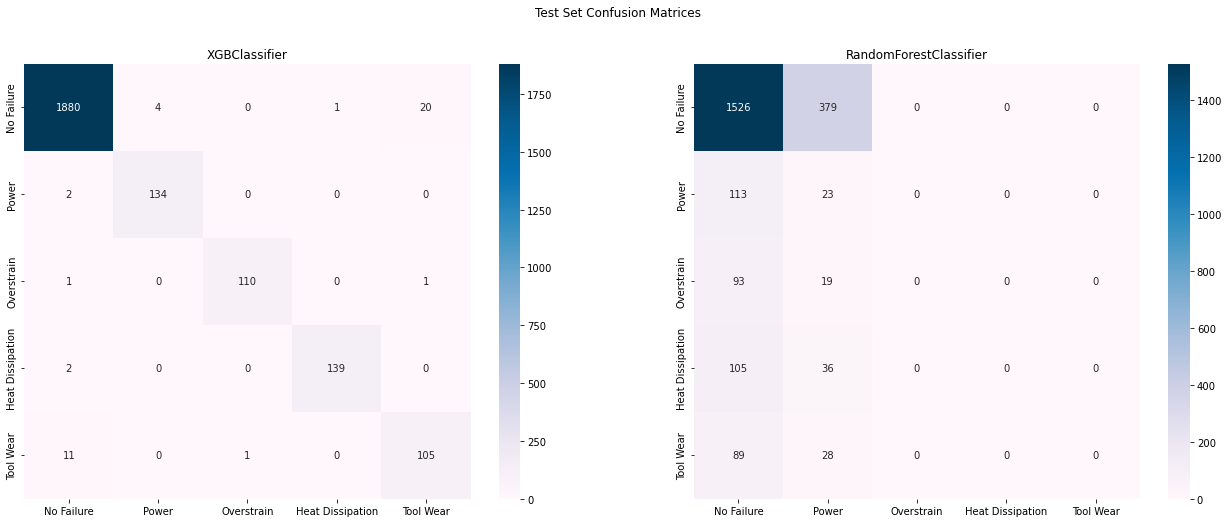

In [257]:

xgb_cm = confusion_matrix(y_test, xgb_pred)
rcf_cm = confusion_matrix(y_test, rfc_pred)

fig,ax = plt.subplots(ncols = 2,figsize=(22,8))

fig.suptitle('Test Set Confusion Matrices')

plt.xlabel('Predicted Class')
plt.ylabel('True Class')

sns.heatmap(ax = ax[0], data=xgb_cm, annot=True,
                fmt='d', cmap='PuBu')

sns.heatmap(ax = ax[1], data=rcf_cm, annot=True,
                fmt='d', cmap='PuBu')

ax[0].title.set_text('XGBClassifier')
ax[1].title.set_text('RandomForestClassifier')

ax[0].xaxis.set_ticklabels(['No Failure', 'Power', 'Overstrain','Heat Dissipation', 'Tool Wear']) 
ax[0].yaxis.set_ticklabels(['No Failure', 'Power', 'Overstrain','Heat Dissipation', 'Tool Wear']) 
ax[1].xaxis.set_ticklabels(['No Failure', 'Power', 'Overstrain','Heat Dissipation', 'Tool Wear']) 
ax[1].yaxis.set_ticklabels(['No Failure', 'Power', 'Overstrain','Heat Dissipation', 'Tool Wear']) 



plt.show()

XGB features importance

In [271]:
import shap
# compute the SHAP values for every prediction in the validation dataset
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

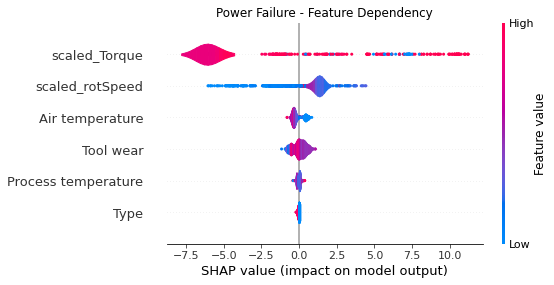

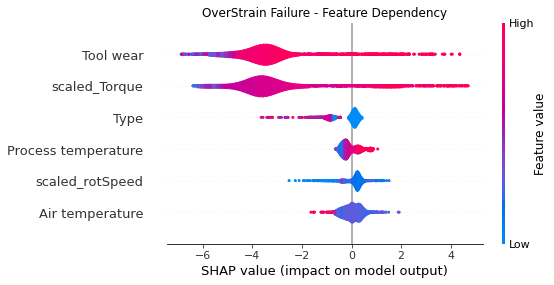

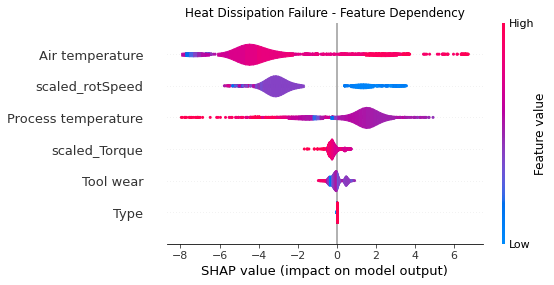

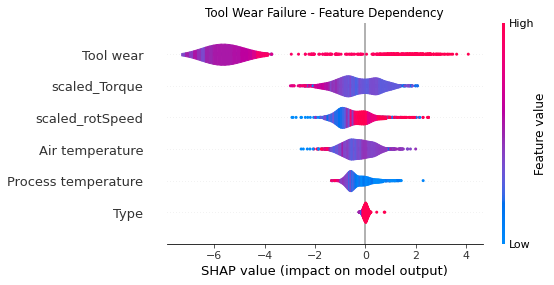

In [380]:


shap.summary_plot(shap_values[1], X_test, plot_type="violin", show=False)
plt.title("Power Failure - Feature Dependency")
plt.show()


shap.summary_plot(shap_values[2], X_test, plot_type="violin", show=False)
plt.title("OverStrain Failure - Feature Dependency")
plt.show()

shap.summary_plot(shap_values[3], X_test, plot_type="violin", show=False)
plt.title("Heat Dissipation Failure - Feature Dependency")
plt.show()

shap.summary_plot(shap_values[4], X_test, plot_type="violin", show=False)
plt.title("Tool Wear Failure - Feature Dependency")
plt.show()


#### Insight
The local explanation summary shows the direction of the relationship between a variable and Failure Type. Positive SHAP-values are indicative of Failed(with a certain Failure Type), while negative SHAP-values are indicative of Not Faild(with a certain Failure Type). 

    For example:
    - From the first plot(Power Failure - Feature Dependency), Power Failure occuered when:
        1. Extremely high torque
        2. High Torque & Low Rotational Speed
        
    - From Overstrain Failure - Feature Dependency plot, Overstarin Failure occured when:
        1. High Tool Weark & High Torque
        
    